# Intro to NLP Lab

In this lab, you'll be classifying randomly selected tweets from political officials into whether or not they are partisan tweets or neutral. In the following import statement, we're selecting only the columns that are important, but there may be more useful features in that set. Feel free to explore. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import TruncatedSVD

In [7]:
# Load data
df = pd.read_csv('datasets/political_media.csv',
                usecols=[7, 20])
df.head()

,bias,text
0,partisan,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,partisan,VIDEO - #Obamacare: Full of Higher Costs and ...
2,neutral,Please join me today in remembering our fallen...
3,neutral,RT @SenatorLeahy: 1st step toward Senate debat...
4,partisan,.@amazon delivery #drones show need to update ...


## Set up

Please split the dataset into a training and test set and convert the `bias` feature into 0s and 1s.

In [8]:
# Convert bias to 0s and 1s
df['bias'] = df['bias'].apply(lambda x: 1 if x == 'partisan' else 0)

In [9]:
# Train-test split: X is text, y is bias
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, df['bias'].values)

## Modeling

Please try the following techniques to transform the data. For each technique, do the following:

1. Transform the training data
2. Fit a `RandomForestClassifier` to the transformed training data
3. Transform the test data
4. Discuss the goodness of fit of your model using the test data and a classification report and confusion matrix

### 1. `CountVectorizer()`

In [27]:
# Transform training data
cv = CountVectorizer()

cv.fit(X_train)
X_train_cv = cv.transform(X_train)
print('X_train_cv shape: ', X_train_cv.shape)

X_train_cv shape:  (3750, 15352)


In [28]:
# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
# Transform test data
X_test_cv = cv.transform(X_test)
print('X_test_cv shape: ', X_test_cv.shape)

X_test_cv shape:  (1250, 15352)


In [32]:
# Assess goodness of fit
predictions = rfc.predict(X_test_cv)

rfc_score = rfc.score(X_test_cv, y_test)
conf_mat = confusion_matrix(y_test, predictions)
class_rep = classification_report(y_test, predictions)
print('RFC score: ', rfc_score)
print('')
print('Confusion matrix: ')
print(conf_mat)
print('')
print('Classification report: ')
print(class_rep)

# overall accuracy is 76%
# Precision on neutral tweets is 0.77 - we're misclassifying 23% of neutral tweets as partisan
# Recall on partisan tweets is low at 0.16 - we're misclassifying 84% of partisan tweets as neutral


# Reminder on terms:
# Precision is the ability of the classifier not to label as positive a sample that is negative -> tp / (tp + fp)
# Recall is the ability of the classifier to find the positive samples -> tp / (tp + fn)
# F-beta score is weighted harmonic mean of the precision and recall. Best value = 1 and worst value = 0

RFC score:  0.7632

Confusion matrix: 
[[905  31]
 [265  49]]

Classification report: 
             precision    recall  f1-score   support

          0       0.77      0.97      0.86       936
          1       0.61      0.16      0.25       314

avg / total       0.73      0.76      0.71      1250



### 2. `CountVectorizer()` with your choice of `min_df` and `max_df`

In [33]:
# Transform training data
cv_mm = CountVectorizer(min_df=0.10, max_df=0.90)

cv_mm.fit(X_train)
X_train_cv_mm = cv_mm.transform(X_train)
print('X_train_cv_mm shape: ', X_train_cv_mm.shape)

X_train_cv_mm shape:  (3750, 27)


In [34]:
# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv_mm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
# Transform test data
X_test_cv_mm = cv_mm.transform(X_test)
print('X_test_cv_mm shape: ', X_test_cv_mm.shape)

X_test_cv_mm shape:  (1250, 27)


In [36]:
# Assess goodness of fit
predictions_mm = rfc.predict(X_test_cv_mm)

rfc_score_mm = rfc.score(X_test_cv_mm, y_test)
conf_mat_mm = confusion_matrix(y_test, predictions_mm)
class_rep_mm = classification_report(y_test, predictions_mm)
print('RFC score: ', rfc_score_mm)
print('')
print('Confusion matrix: ')
print(conf_mat_mm)
print('')
print('Classification report: ')
print(class_rep_mm)

# overall accuracy is 72%
# Precision on neutral tweets is 0.76 - 24% of neutral tweets are misclassified as partisan
# Recall on partisan tweets is 0.13 - 87% of partisan tweets are misclassified as neutral

RFC score:  0.7272

Confusion matrix: 
[[868  68]
 [273  41]]

Classification report: 
             precision    recall  f1-score   support

          0       0.76      0.93      0.84       936
          1       0.38      0.13      0.19       314

avg / total       0.66      0.73      0.67      1250



### 3. `CountVectorizer()` with English stop words

In [37]:
# Transform training data
cv_sw = CountVectorizer(stop_words='english')

cv_sw.fit(X_train)
X_train_cv_sw = cv_sw.transform(X_train)
print('X_train_cv_sw shape: ', X_train_cv_sw.shape)

X_train_cv_sw shape:  (3750, 15087)


In [38]:
# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv_sw, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
# Transform test data
X_test_cv_sw = cv_sw.transform(X_test)
print('X_test_cv_sw shape: ', X_test_cv_sw.shape)

X_test_cv_sw shape:  (1250, 15087)


In [40]:
# Assess goodness of fit
predictions_sw = rfc.predict(X_test_cv_sw)

rfc_score_sw = rfc.score(X_test_cv_sw, y_test)
conf_mat_sw = confusion_matrix(y_test, predictions_sw)
class_rep_sw = classification_report(y_test, predictions_sw)
print('RFC score: ', rfc_score_sw)
print('')
print('Confusion matrix: ')
print(conf_mat_sw)
print('')
print('Classification report: ')
print(class_rep_sw)

# overall accuracy is 77%
# Precision on partisan tweets is 0.80 - 20% of neutral tweets are misclassified as partisan
# Recall on partisan tweets is 0.29 - 71% of partisan tweets are misclassified as neutral

RFC score:  0.7664

Confusion matrix: 
[[866  70]
 [222  92]]

Classification report: 
             precision    recall  f1-score   support

          0       0.80      0.93      0.86       936
          1       0.57      0.29      0.39       314

avg / total       0.74      0.77      0.74      1250



### 4. `TfidfVectorizer()` 

In [41]:
# Transform training data
tfidf = TfidfVectorizer()

tfidf.fit(X_train)
X_train_tf = tfidf.transform(X_train)
print('X_train_tf shape: ', X_train_tf.shape)

X_train_tf shape:  (3750, 15352)


In [42]:
# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# Transform test data
X_test_tf = tfidf.transform(X_test)
print('X_test_tf shape: ', X_test_tf.shape)

X_test_tf shape:  (1250, 15352)


In [44]:
# Assess goodness of fit
predictions_tf = rfc.predict(X_test_tf)

rfc_score_tf = rfc.score(X_test_tf, y_test)
conf_mat_tf = confusion_matrix(y_test, predictions_tf)
class_rep_tf = classification_report(y_test, predictions_tf)
print('RFC score: ', rfc_score_tf)
print('')
print('Confusion matrix: ')
print(conf_mat_tf)
print('')
print('Classification report: ')
print(class_rep_tf)

# overall accuracy is 75%
# Precision on partisan tweets is 0.77 - 23% of neutral tweets are misclassified as partisan
# Recall on partisan tweets is 0.18 - 82% of partisan tweets are misclassified as neutral

RFC score:  0.7488

Confusion matrix: 
[[879  57]
 [257  57]]

Classification report: 
             precision    recall  f1-score   support

          0       0.77      0.94      0.85       936
          1       0.50      0.18      0.27       314

avg / total       0.70      0.75      0.70      1250



### 5. `TfidfVectorizer()` with English stop words

In [45]:
# Transform training data
tfidf_sw = TfidfVectorizer(stop_words='english')

tfidf_sw.fit(X_train)
X_train_tf_sw = tfidf_sw.transform(X_train)
print('X_train_tf_sw shape: ', X_train_tf_sw.shape)

X_train_tf_sw shape:  (3750, 15087)


In [46]:
# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tf_sw, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
# Transform test data
X_test_tf_sw = tfidf_sw.transform(X_test)
print('X_test_tf_sw shape: ', X_test_tf_sw.shape)

X_test_tf_sw shape:  (1250, 15087)


In [48]:
# Assess goodness of fit
predictions_tf_sw = rfc.predict(X_test_tf_sw)

rfc_score_tf_sw = rfc.score(X_test_tf_sw, y_test)
conf_mat_tf_sw = confusion_matrix(y_test, predictions_tf_sw)
class_rep_tf_sw = classification_report(y_test, predictions_tf_sw)
print('RFC score: ', rfc_score_tf_sw)
print('')
print('Confusion matrix: ')
print(conf_mat_tf_sw)
print('')
print('Classification report: ')
print(class_rep_tf_sw)

# overall accuracy is 76%
# Precision on partisan tweets is 0.79 - 21% of neutral tweets are misclassified as partisan
# Recall on partisan tweets is 0.28 - 72% of partisan tweets are misclassified as neutral

RFC score:  0.7584

Confusion matrix: 
[[859  77]
 [225  89]]

Classification report: 
             precision    recall  f1-score   support

          0       0.79      0.92      0.85       936
          1       0.54      0.28      0.37       314

avg / total       0.73      0.76      0.73      1250



### Moving forward

With the remainder of your time, please try and find the best model and data transformation to predict partisan tweets. This is a challenging data set and can be approached from a number of ways.

Some techniques to try are:

1. Different types of data transformation 
2. Custom preprocessors for `CountVectorizer`
3. Custom stopword lists
4. Use of a dimensionality reduction technique (like `TruncatedSVD`)
5. Optimizing hyperparameters using `GridSearchCV`
6. Trying a different modeling technique such as `KNeighborsClassifier` or `LogisticRegression`

In [51]:
# Technique 1: Set CountVectorizer with an ngram_range of (1,2), giving 1- and 2-word pairs

# Transform training data
cv_ng = CountVectorizer(ngram_range=(1,2))

cv_ng.fit(X_train)
X_train_cv_ng = cv_ng.transform(X_train)
print('X_train_cv_ng shape: ', X_train_cv_ng.shape)

# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv_ng, y_train)

# Transform test data
X_test_cv_ng = cv_ng.transform(X_test)
print('X_test_cv_ng shape: ', X_test_cv_ng.shape)
print('')

# Assess goodness of fit
predictions_ng = rfc.predict(X_test_cv_ng)

rfc_score_ng = rfc.score(X_test_cv_ng, y_test)
conf_mat_ng = confusion_matrix(y_test, predictions_ng)
class_rep_ng = classification_report(y_test, predictions_ng)
print('RFC score: ', rfc_score_ng)
print('')
print('Confusion matrix: ')
print(conf_mat_ng)
print('')
print('Classification report: ')
print(class_rep_ng)

# overall accuracy is 76%
# Precision on neutral tweets is 0.77 - we're misclassifying 23% of neutral tweets as partisan
# Recall on partisan tweets is low at 0.12 - we're misclassifying 88% of partisan tweets as neutral

X_train_cv_ng shape:  (3750, 84870)
X_test_cv_ng shape:  (1250, 84870)

RFC score:  0.7608

Confusion matrix: 
[[912  24]
 [275  39]]

Classification report: 
             precision    recall  f1-score   support

          0       0.77      0.97      0.86       936
          1       0.62      0.12      0.21       314

avg / total       0.73      0.76      0.70      1250



X_train_cv shape:  (3750, 15352)


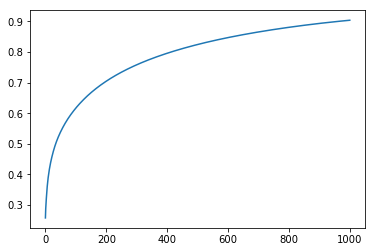

In [56]:
# Technique 2: Use the dimensionality reduction technique TruncatedSVD

# Transform training data
cv = CountVectorizer()

cv.fit(X_train)
X_train_cv = cv.transform(X_train)
print('X_train_cv shape: ', X_train_cv.shape)

# Plot explained variance ratio and look for a useful cutoff point
tsvd = TruncatedSVD(n_components=1000)
tsvd.fit(X_train_cv)
plt.plot(range(1000), tsvd.explained_variance_ratio_.cumsum())
# the rate of change begins to flatten out around 100

In [60]:
# Fit the training data
tsvd = TruncatedSVD(n_components=100)
tsvd.fit(X_train_cv)
X_train_cv_tsvd = tsvd.transform(X_train_cv)

# Fit RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_cv_tsvd, y_train)

# Transform test data
X_test_cv = cv.transform(X_test)
X_test_cv_tsvd = tsvd.transform(X_test_cv)
print('X_test_cv_tsvd shape: ', X_test_cv_tsvd.shape)
print('')

# Assess goodness of fit
predictions_cv_tsvd = rfc.predict(X_test_cv_tsvd)

rfc_score_cv_tsvd = rfc.score(X_test_cv_tsvd, y_test)
conf_mat_cv_tsvd = confusion_matrix(y_test, predictions_cv_tsvd)
class_rep_cv_tsvd = classification_report(y_test, predictions_cv_tsvd)
print('RFC score: ', rfc_score_cv_tsvd)
print('')
print('Confusion matrix: ')
print(conf_mat_cv_tsvd)
print('')
print('Classification report: ')
print(class_rep_cv_tsvd)

# overall accuracy is 73%
# Precision on neutral tweets is 0.76 - we're misclassifying 24% of neutral tweets as partisan
# Recall on partisan tweets is low at 0.10 - we're misclassifying 90% of partisan tweets as neutral

X_test_cv_tsvd shape:  (1250, 100)

RFC score:  0.7256

Confusion matrix: 
[[875  61]
 [282  32]]

Classification report: 
             precision    recall  f1-score   support

          0       0.76      0.93      0.84       936
          1       0.34      0.10      0.16       314

avg / total       0.65      0.73      0.67      1250

